# Classification of Images of Clothes Using CNN

<p><img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F549262%2Fd6f4f6e13fa211c9e773479566d89ac9%2FExample-for-fashion-MNIST-Each-class-is-represented-by-nine-cases.png?generation=1576784453715625&alt=media" width="1000" height = "800" alt="Fashion Mnist Challenge"></p>

#### Image source : Kaggle


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform
import imageio
import PIL
import time
import os
import glob
import zipfile

from IPython import display

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\Anurag\Desktop\mpr-6-ml\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\Anurag\Desktop\mpr-6-ml\input\fashionmnist\fashion-mnist_test.csv
C:\Users\Anurag\Desktop\mpr-6-ml\input\fashionmnist\fashion-mnist_train.csv
C:\Users\Anurag\Desktop\mpr-6-ml\input\fashionmnist\t10k-images-idx3-ubyte
C:\Users\Anurag\Desktop\mpr-6-ml\input\fashionmnist\t10k-labels-idx1-ubyte
C:\Users\Anurag\Desktop\mpr-6-ml\input\fashionmnist\train-images-idx3-ubyte
C:\Users\Anurag\Desktop\mpr-6-ml\input\fashionmnist\train-labels-idx1-ubyte


In [2]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.9.13
Tensorflow version: 2.12.0
Keras version: 2.12.0


In [3]:
train = pd.read_csv(r'C:\Users\Anurag\Desktop\mpr-6-ml\input\fashionmnist\fashion-mnist_train.csv')
test = pd.read_csv(r'C:\Users\Anurag\Desktop\mpr-6-ml\input\fashionmnist\fashion-mnist_test.csv')

## 3. Data Overview <a class="anchor" id="dOverview"></a>
This kernel uses the Fashion-MNIST dataset of Zalando's article images which contains 60,000 grayscale images of a training set and 10,000 of test set in 10 categories. The images show individual articles of clothing at 28X28 pixcels resolution. 

[Back to Table of Contents](#bcImp)
### 3.1. Diamension of train and test data <a class="anchor" id="dTrainTest"></a>
[Back to Table of Contents](#bcImp)

In [4]:
labels_to_drop = [5, 7, 8, 9]
mask = train['label'].isin(labels_to_drop)
train=train[~mask]
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0


In [5]:
labels_to_drop = [5, 7, 8, 9]
mask = test['label'].isin(labels_to_drop)
test=test[~mask]
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 59996
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 215.9 MB


(None, (36000, 785))

In [7]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 36.0 MB


(None, (6000, 785))

## 3.2. Training and testing dataset<a class="anchor" id="splitData"></a>
[Back to Table of Contents](#bcImp)

We will train the network with 60,000 images (training set) and evaluate it's accuracy with 10,000 images (testing set).

In [8]:
X_train = train.iloc[:, 1:785]
y_train = train.iloc[:, 0]

X_test = test.iloc[:, 1:785]
y_test = test.iloc[:, 0]

## 3.3. Visualizing the data using TSNE <a class="anchor" id="tsne"></a>
[Back to Table of Contents](#bcImp)

<b>TSNE</b> - t-Distributed Stochastic Neighbor embedding. This is a dimensionality reduction algorithm that is designed to keep local structure in the high dimensional data set, but cares less about global structure. Here, we use it to go from the 784 pixel-dimension of the images to two dimensions. This makes plotting easier. The color scale is the original MNIST label and one can see that the separation of the labels is apparent.

In [9]:
# WARNING: running t-SNE on the full data set takes a while.
# X_tsn = X_train/255

# from sklearn.manifold import TSNE
# tsne = TSNE()

# tsne_res = tsne.fit_transform(X_tsn)

In [10]:
# plt.figure(figsize=(14, 12))
# plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
# plt.xticks([])
# plt.yticks([])
# plt.colorbar();

## 3.4. Diamension of training and testing data<a class="anchor" id="dTrainVal"></a>
[Back to Table of Contents](#bcImp)

In [11]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_test.shape)
print('y_validation:', y_test.shape)

X_train: (36000, 784)
y_train: (36000,)
X_validation: (6000, 784)
y_validation: (6000,)


### 3.5. Converting training, and testing dataset into NumPy arrays<a class="anchor" id="reTrainTestVal"></a>
[Back to Table of Contents](#bcImp)

The images are NumPy arrays of 28x28 pixels with values ranging from 0 to 255. The labels are an array of integers numbered 0 to 9. These correspond to the clothing class represented by the image.

In [15]:
x_train_re = X_train.to_numpy().reshape(36000, 28, 28)
y_train_re = y_train.values
x_test_re = X_test.to_numpy().reshape(6000, 28, 28)
y_test_re = y_test.values

### 3.6. Diamension of training, and testing data after reshape<a class="anchor" id="dreshape">
[Back to Table of Contents](#bcImp)

In [16]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_test:', x_test_re.shape)
print('y_test:', y_test_re.shape)
print('x_test:', x_test_re.shape)

x_train: (36000, 28, 28)
y_train: (36000,)
x_test: (6000, 28, 28)
y_test: (6000,)
x_test: (6000, 28, 28)


Each image is associated with a single label. Since the clothing class names are not included with the dataset, store  them here for later use when plotting the images:

In [17]:
clothing_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Shirt']

The labels are an array of integers numbered 0 to 9.

In [18]:
y_train_re, len(y_train_re)

(array([2, 6, 0, ..., 0, 2, 1], dtype=int64), 36000)

In [20]:
y_test_re, len(y_test_re), set(y_test_re)

(array([0, 1, 2, ..., 0, 6, 1], dtype=int64), 6000, {0, 1, 2, 3, 4, 6})

In [21]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


 ### In summary <a class ="anchor" id ="summaryData"></a>
 [Back to Table of Contents](#bcImp)

## 4. Explore the data <a class="anchor" id="exploreData">
[Back to Table of Contents](#bcImp)
    
Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from 0 to 255) and each integer represents a color of a pixel.

In [22]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,88,201,228,...,255,135,0,0,0,0,0,0,0,0
5,0,0,0,0,0,47,252,234,238,224,...,231,249,254,45,0,0,0,0,0,0
6,0,0,1,0,0,214,222,210,213,224,...,223,221,240,254,0,0,1,0,0,0
7,1,0,0,0,128,237,207,224,224,207,...,213,226,211,237,150,0,0,0,0,0
8,0,2,0,0,237,222,215,207,210,212,...,214,206,199,218,255,13,0,2,0,0
9,0,4,0,85,228,210,218,200,211,208,...,210,217,206,213,231,175,0,0,0,0


### 4.1. Visualise the article images <a class ="anchor" id="visualizeData"></a>
[Back to Table of Contents](#bcImp)

We can inspect the first image in the training set, we can see that the pixel values fall in the range of 0 to 255:

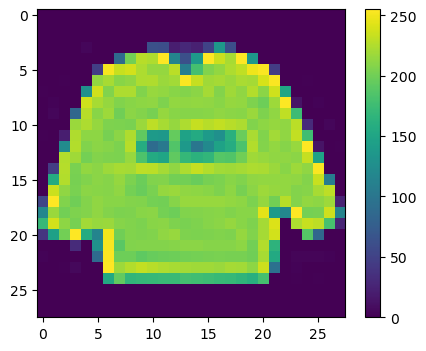

In [23]:
plt.figure(figsize=(5, 4))
plt.imshow(x_train_re[0])
plt.colorbar()
plt.grid(False)
plt.show()

Our first record of training data represents a T-shirt/top.

Let's display the first 25 images of article from the training set and also display the class name below each image. This will give us the sense of data is in correct format for training our model.

In [26]:
# numbers_to_display = 25
# num_cells = math.ceil(math.sqrt(numbers_to_display))
# plt.figure(figsize=(10,10))
# for i in range(numbers_to_display):
#     plt.subplot(num_cells, num_cells, i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(x_train_re[i], cmap=plt.cm.binary)
#     plt.xlabel(clothing_class_names[y_train[i]])
# plt.show()

### 4.2. Reshaping training, and testing data <a class ="anchor" id = "reshapeData"></a>
[Back to Table of Contents](#bcImp)

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. We need to reshape it to (28, 28, 1) shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

#### Reshaping training dataset

In [27]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [28]:
print('Shape of the training dataset after reshape: ', x_train_with_chanels.shape)

Shape of the training dataset after reshape:  (36000, 28, 28, 1)


#### Reshaping testing dataset

In [29]:
x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [30]:
print('Shape of the testing dataset  after reshape: ', x_test_with_chanels.shape)

Shape of the testing dataset  after reshape:  (6000, 28, 28, 1)


### 4.3 Normalize training, and testing dataset <a class ="anchor" id ="normalizeData"></a>
[Back to Table of Contents](#bcImp)

Before feeding these values [0...255] to the neural network model, we scale them to a range of -1 to 1. We do this by dividing the values by 255.0.

In [31]:
# Normalize image pixel values to [-1, 1] range
x_train_normalized = x_train_with_chanels / 255.0
x_test_normalized = x_test_with_chanels / 255.0

In [32]:
# Let's check just one row from the 0th image to see values after normalization.
x_train_normalized[0,:,:,0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### 5. Build the CNN model to Classify clothing images <a class = "anchor" id = "modeling"></a>


Building the neural network requires setting up the layers of the model, then compiling the model.

We are using Sequential Keras model which has two pairs of Convolution2D and MaxPooling2D layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging. After that we will use Flatten layer to convert multidimensional parameters to vector.

The last layer will be a Dense layer with 10 Softmax outputs. The output represents the network guess. 

In [73]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg16 import VGG16

# Load the pre-trained VGG-16 model without the top layers
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add the top layers for the MNIST classification task
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

# Create the final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 5.1. Summary of the training model <a class ="anchor" id = "modelSummary"></a>
[Back to Table of Contents](#bcImp)

Here is our model summary so far.

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

### 5.2. Visualization of the model using graphviz <a class ="anchor" id = "modelplot"></a>
[Back to Table of Contents](#bcImp)

In order to plot the model the graphviz should be installed.

In [35]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 5.3 Compile the model using keras.optimizers.Adam <a class ="anchor" id = "compileModel"></a>
[Back to Table of Contents](#bcImp)

In [38]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


### 5.4 Train the model <a class ="anchor" id ="trainModel"></a>
[Back to Table of Contents](#bcImp)



In [71]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)
training_history=model.fit(x_train_normalized , y_train_re, batch_size=64, epochs=10, validation_data=(x_test_normalized,y_test_re))

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Anurag\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Anurag\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Anurag\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Anurag\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Anurag\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Anurag\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 28, 28, 1)


### In summary<a class ="anchor" id ="modelBuildSummary"></a>
[Back to Table of Contents](#bcImp)

### 6. Model evaluation<a class ="anchor" id ="modelEvaluation"></a>
[Back to Table of Contents](#bcImp1)

### 6.1 Loss plot curve for training and testing<a class="anchor" id ="lossPlot"><a/>
[Back to Table of Contents](#bcImp1)
    
Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

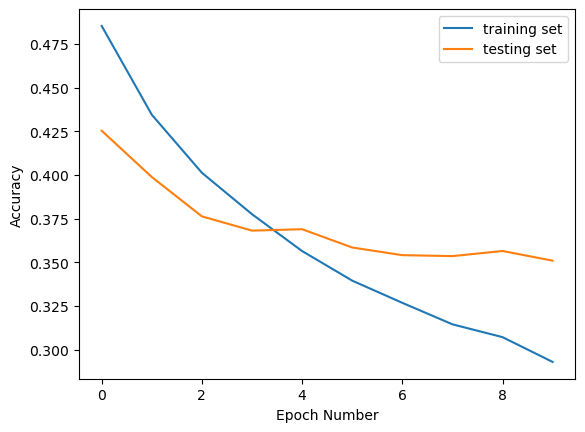

In [40]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='testing set')
plt.legend()

### 6.2. Accuracy plot curve for training and testing<a class="anchor" id ="accuracyPlot"><a/>
[Back to Table of Contents](#bcImp1)

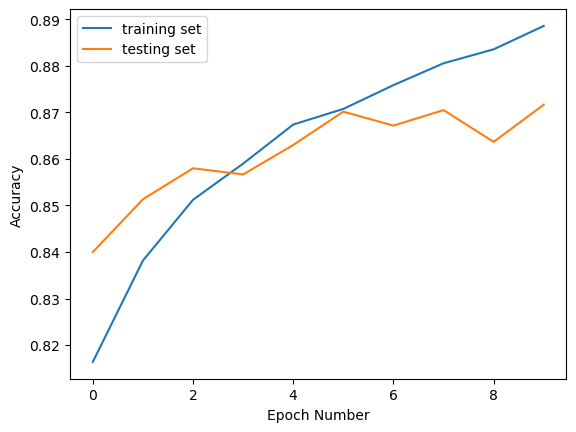

In [41]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='testing set')
plt.legend()

### 6.3. Evaluation of the model accuracy<a class ="anchor" id ="accuracyEvaluation"></a>
[Back to Table of Contents](#bcImp1)

We need to compare the accuracy of our model on training set and on test set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### 6.3.1 Performance of training dataset <a class ="anchor" id ="perfTrain"></a>
[Back to Table of Contents](#bcImp1)

In [42]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [43]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.24954839050769806
Train accuracy:  0.9058055281639099


### 6.3.2. Performance of the test dataset <a class ="anchor" id ="perfValidation"></a>
[Back to Table of Contents](#bcImp1)

In [44]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test_re)

In [45]:
print('Testing loss: ', validation_loss)
print('Testing accuracy: ', validation_accuracy)

Testing loss:  0.3509289026260376
Testing accuracy:  0.871666669845581


### 6.3.3. Save and load the model<a class ="anchor" id ="saveModel"></a>
[Back to Table of Contents](#bcImp1)

We will save the entire model to a HDF5 file. The .h5 extension of the file indicates that the model shuold be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (tfjs_layers_model with .json and .bin files) using tensorflowjs_converter.

In [46]:
model_name = 'fashion_mnist_cnn.h5'
model.save(model_name, save_format='h5')

In [47]:
loaded_model = tf.keras.models.load_model(model_name)

### 6.3.4. Visualize test predicted image category<a class ="anchor" id ="visualizevalidation"></a>
[Back to Table of Contents](#bcImp1)

To use the model that we've just trained for image classification we need to call predict() method.

In [48]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

188/188 [==============================] - 1s 7ms/step


In [49]:
predictions_one_hot[0]

array([9.9764878e-01, 1.4448908e-08, 9.8686578e-05, 5.1498814e-06,
       2.1151989e-06, 1.6758336e-16, 2.2452963e-03, 1.1805321e-16,
       1.0252493e-16, 5.2756593e-17], dtype=float32)

In [50]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (6000, 10)


Each prediction consists of 10 probabilities (one for each number from 0 to 9). We need to pick the image number with the highest probability since this would be an image that our model most confident with.

In [51]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,9.976488e-01,1.444891e-08,9.868658e-05,5.149881e-06,2.115199e-06,1.675834e-16,2.245296e-03,1.180532e-16,1.025249e-16,5.275659e-17
1,1.560878e-09,1.000000e+00,6.965840e-13,2.532545e-10,1.487884e-09,1.061703e-32,2.367995e-11,2.044139e-31,2.726578e-31,3.137660e-32
2,6.769397e-03,1.213045e-07,8.140874e-01,1.718366e-03,1.836351e-03,1.256505e-13,1.755884e-01,2.074854e-13,2.100778e-13,2.246090e-13
3,4.208229e-01,1.324705e-02,2.982043e-01,5.020889e-03,1.078283e-01,9.332536e-12,1.548765e-01,1.694652e-11,1.166911e-11,2.754293e-11
4,8.234737e-02,4.433460e-06,2.792153e-02,6.631580e-01,6.112417e-02,4.743435e-13,1.654444e-01,5.703784e-13,5.707734e-13,4.646652e-13
...,...,...,...,...,...,...,...,...,...,...
5995,1.321180e-05,9.768809e-07,4.145301e-04,1.002959e-04,9.992901e-01,7.835926e-15,1.808873e-04,2.236547e-14,3.158955e-15,4.077432e-15
5996,9.870451e-01,5.232736e-09,2.323981e-03,2.373633e-06,1.094172e-04,1.211198e-18,1.051921e-02,4.469691e-19,2.996496e-19,1.772104e-19
5997,9.679089e-01,2.137685e-05,1.827196e-04,9.872885e-04,8.665769e-05,9.258030e-14,3.081308e-02,1.389904e-13,6.829009e-14,4.441594e-14
5998,2.368862e-03,9.260125e-07,2.486355e-01,1.287340e-02,1.160666e-01,6.764764e-12,6.200548e-01,1.211423e-11,9.991876e-12,9.718766e-12


In [52]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,0
1,1
2,2
3,0
4,3
...,...
5995,4
5996,0
5997,0
5998,6


In [53]:
print(predictions[0])
print(clothing_class_names[predictions[0]])

0
T-shirt/top


In [54]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(clothing_class_names[predicted_label],
                                100*np.max(predictions_array),
                                clothing_class_names[true_label]),
                                color=color)

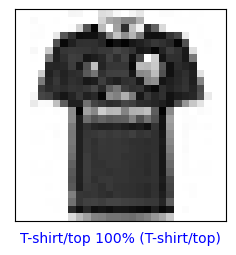

In [55]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_one_hot, y_test_re, x_test_normalized)

So the model is most confident that this image is an T-shirt/top, or clothing_class_names[0]. And we can check the test label to see this is correct:

Let's print the first image from a test set to see if model's prediction is correct.


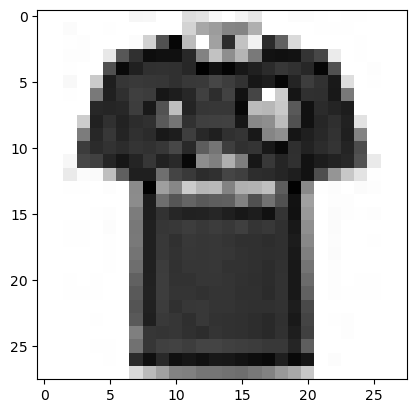

In [56]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized the image. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

In [ ]:
# numbers_to_display = 36
# num_cells = math.ceil(math.sqrt(numbers_to_display))
# plt.figure(figsize=(15, 15))

# for plot_index in range(numbers_to_display):    
#     predicted_label = predictions[plot_index]
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     color_map = 'Greens' if predicted_label == y_test_re[plot_index] else 'Reds'
#     plt.subplot(num_cells, num_cells, plot_index + 1)
#     plot_image(plot_index, predictions_one_hot, y_test_re, x_test_normalized)
#     #plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
#     #plt.xlabel(predicted_label)

# plt.subplots_adjust(hspace=1, wspace=0.5)
# plt.show()

### 6.3.5. Confusion matrix of validation dataset <a class = "anchor" id = "cmValidation"></a>
[Back to Table of Contents](#bcImp1)

### Plotting a confusion matrix
Confusion matrix shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number 5 with 3 or number 2 with 3.

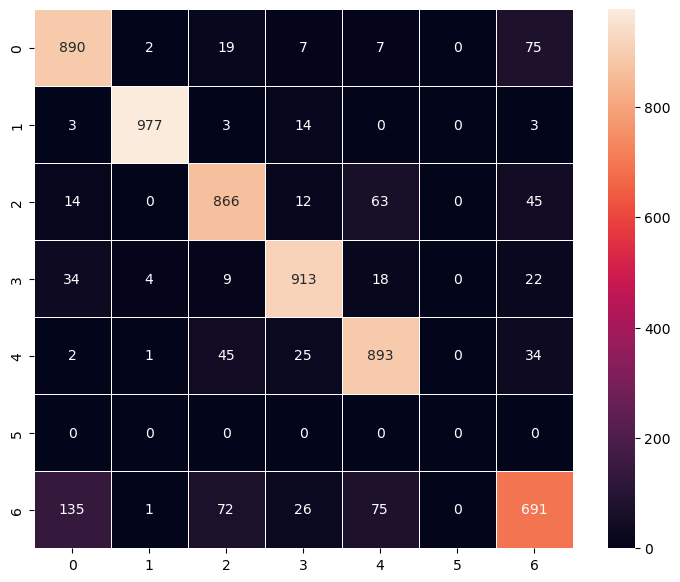

In [57]:
confusion_matrix = tf.math.confusion_matrix(y_test_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

### In summary<a class="anchor" id ="modelEvaluationSummary"></a>
[Back to Table of Contents](#bcImp1)

In [ ]:
# test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
# test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
# test_pred.index.name = 'ImageId'
# test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
# test_pred['ImageId'] = test_pred['ImageId'] + 1

# test_pred.head()

In [ ]:
# test_pred.to_csv('mnist_digit_submission.csv', index = False)

#### We highly appreciate your time you spent on wonderful kernels for helping us learn from your experiences🙏.

If this helped in your learning, then please 👍 UPVOTE as they are the source of motivation 😔👈🏋🥇.